In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

dataSet = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp1/dataSets/playlist_spotify.csv?token=GHSAT0AAAAAACVP4BK7WPGI4QDXWPAHODX2ZYDDP7Q'
dataSet = pd.read_csv(dataSet)

##A
Suponemos poder separar el dataSet en grupos donde los ritmos y estilos de musica sean similares. a priori podriamos mirar cada columna individual y separarla por grupos, pero debe haber una forma mas inteligente de combinar las features y dividirlos en k grupos.

In [ ]:
dataSet.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249


## B

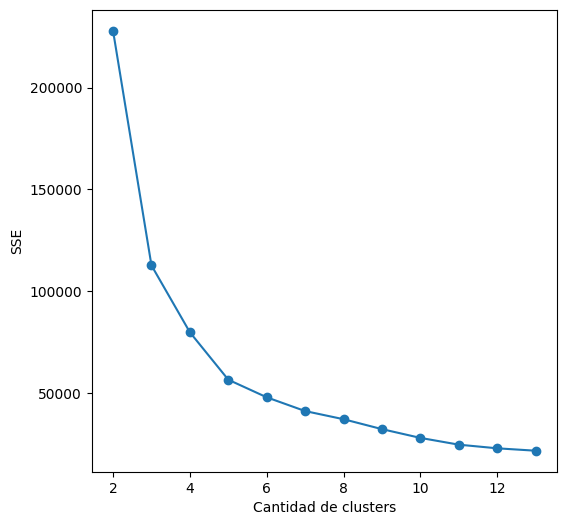

In [ ]:
# analizo el codo entre 2 y 14
sse = []
list_k = list(range(2, 14))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(dataSet[columns_of_interest])
    sse.append(km.inertia_)

# Grafico el SSE (Sum of Squared Errors) por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

el codo no es muy claro, pero esta al rededor del k=[3,4] porque es donde empieza a aplanarse la curva


## C

In [ ]:
# calculo silhouette
list_k = list(range(2, 8))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dataSet[columns_of_interest])
    score = silhouette_score(dataSet[columns_of_interest], preds)
    print ("para K = " + str(n_clusters) + " silhouette score es " + str(score))

para K = 2 silhouette score es 0.5338129808007042
para K = 3 silhouette score es 0.534992401262644
para K = 4 silhouette score es 0.47565291182926867
para K = 5 silhouette score es 0.45443417287812354
para K = 6 silhouette score es 0.4355650416680771
para K = 7 silhouette score es 0.40906353677319385


## D

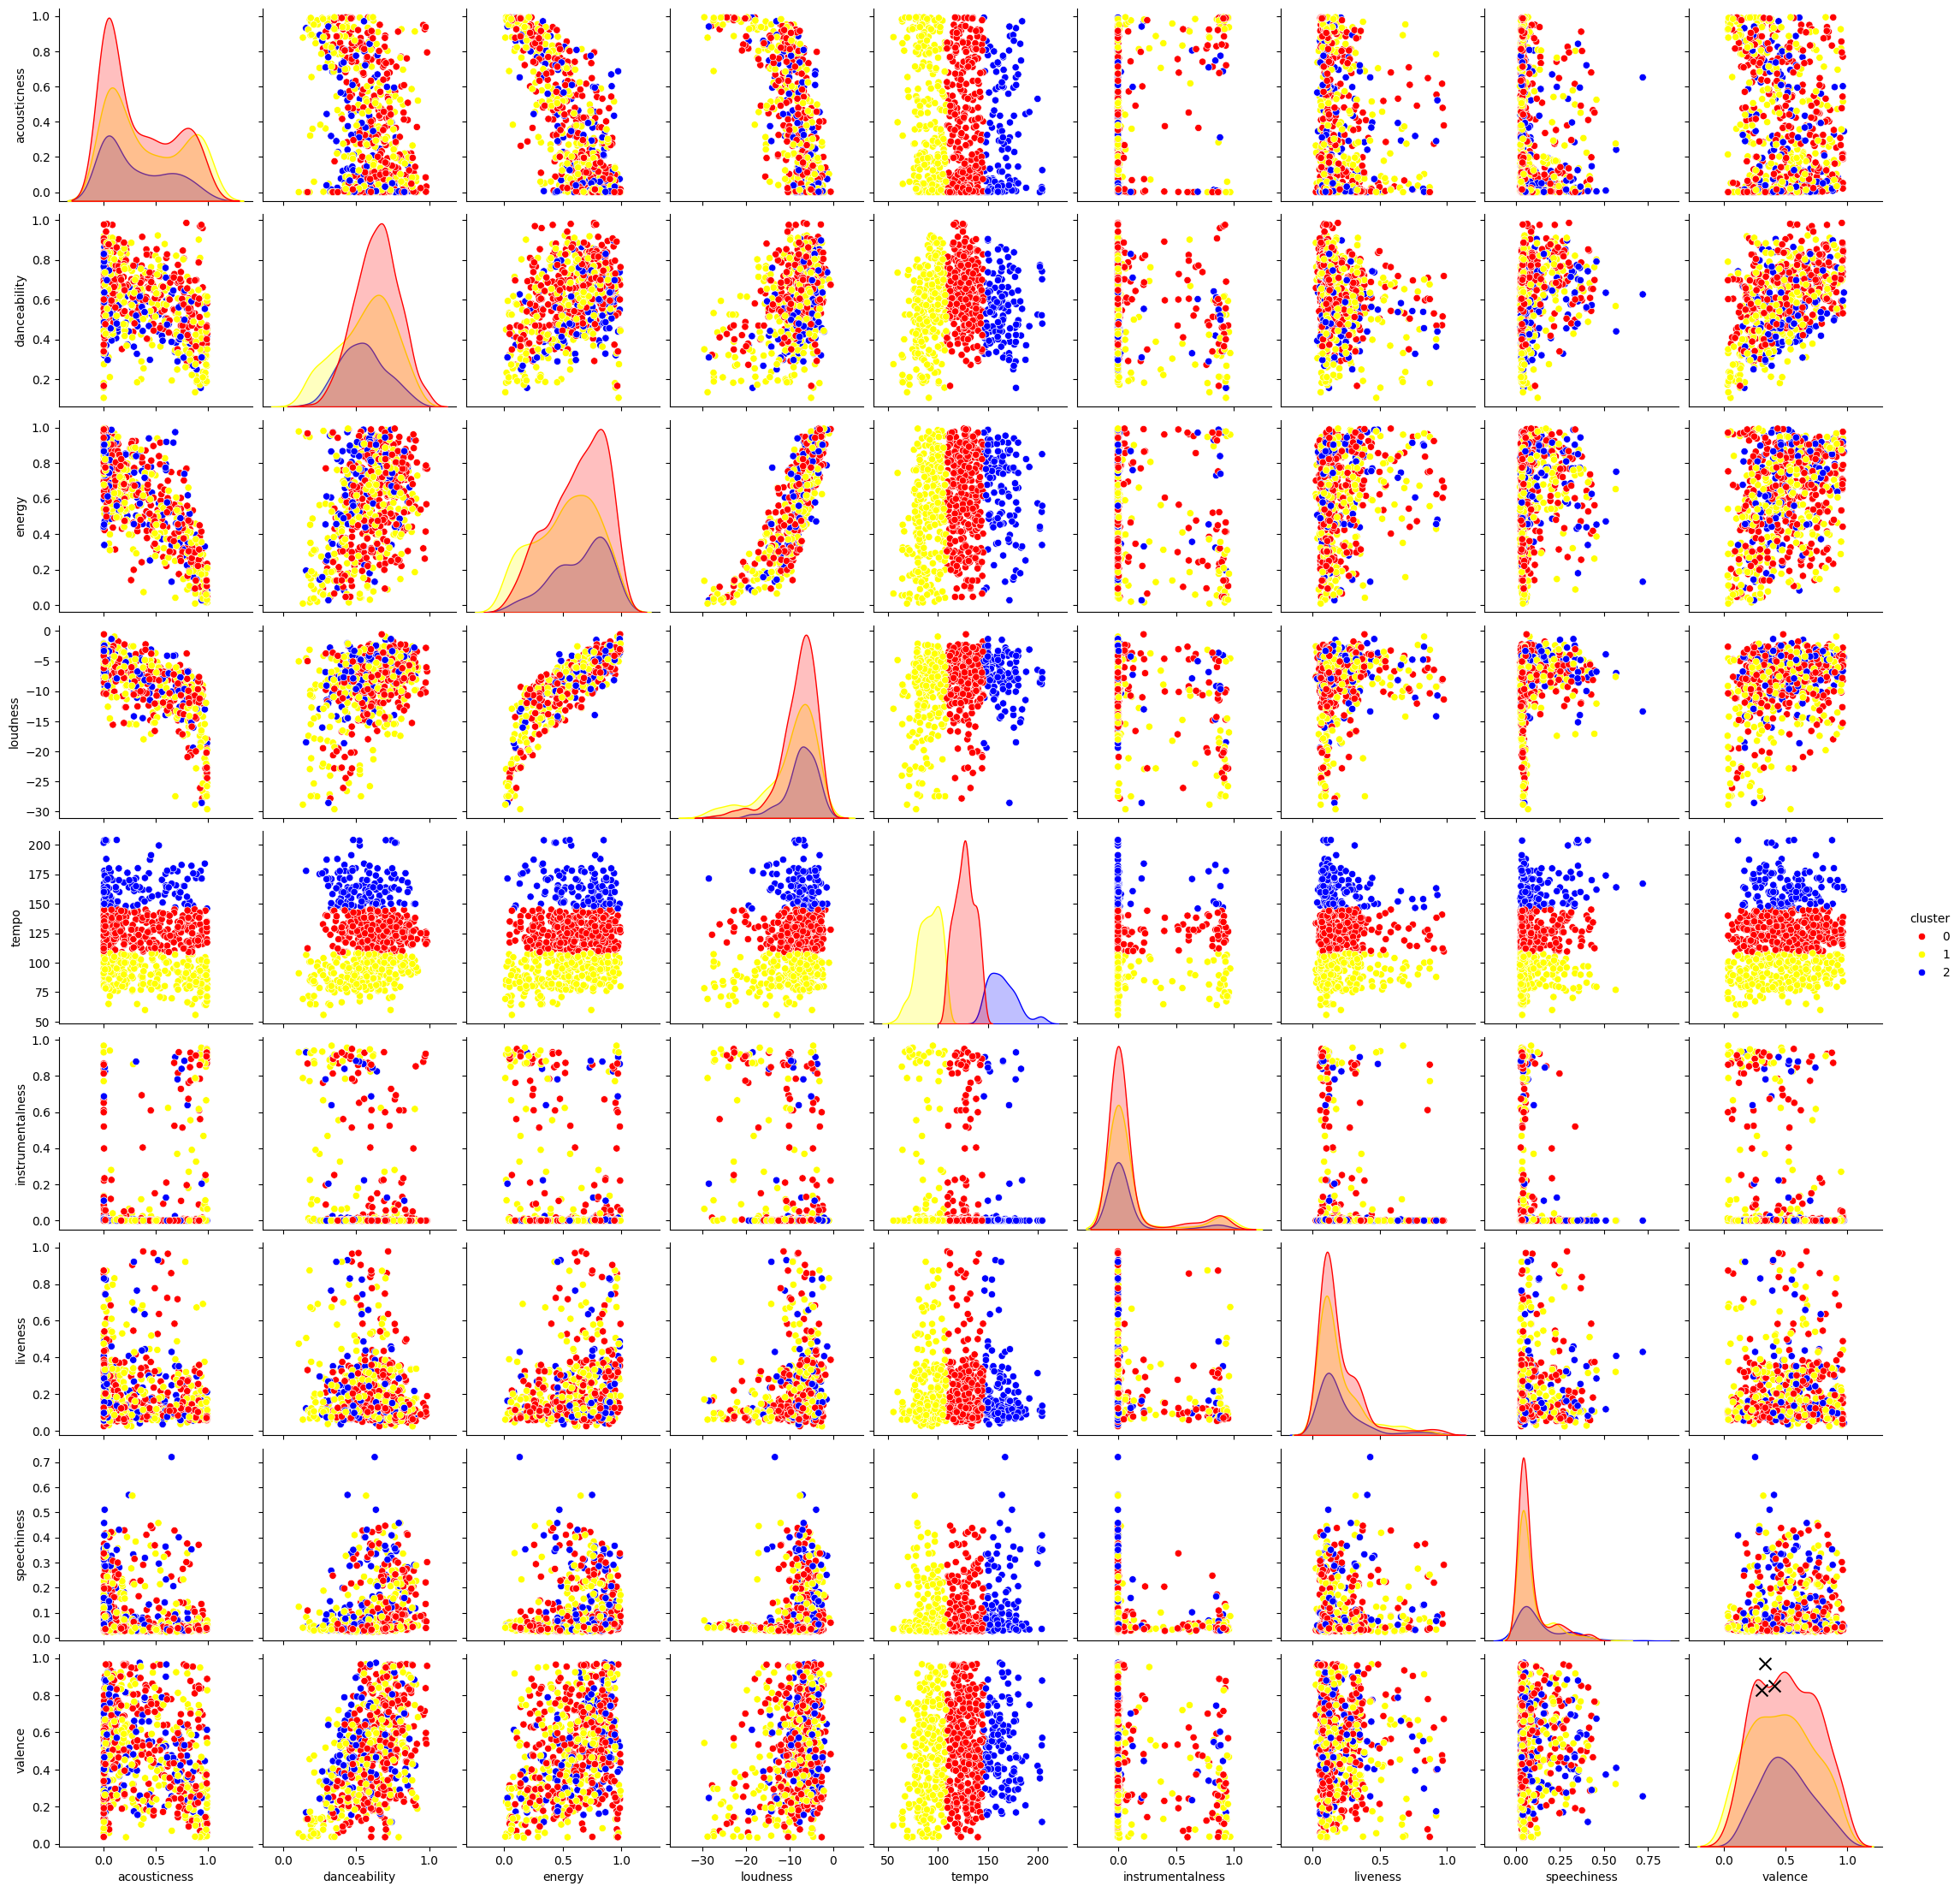

In [ ]:
# pairplot entre cada feature
n_clusters = 3

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataSet[columns_of_interest])

dataSet['cluster'] = kmeans.labels_

# centroides de los clusters
centroids = kmeans.cluster_centers_

# pairplot con colores para cada cluster
sns.pairplot(dataSet, vars=columns_of_interest, hue='cluster', palette=['red', 'yellow', 'blue'], diag_kind='kde')

# Agregar los centroides al pairplot
for i in range(n_clusters):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=100, color='black')

plt.show()


Parece que el tempo es la caracteristica donde mas facil se ve una separacion de los grupos. El resto de las caracteristicas no son muy faciles de ver, solo se destaca que el cluster 0 en general "contiene" a los demas y tiene maximos de liveness, valance, danceability, energy y accusticness.

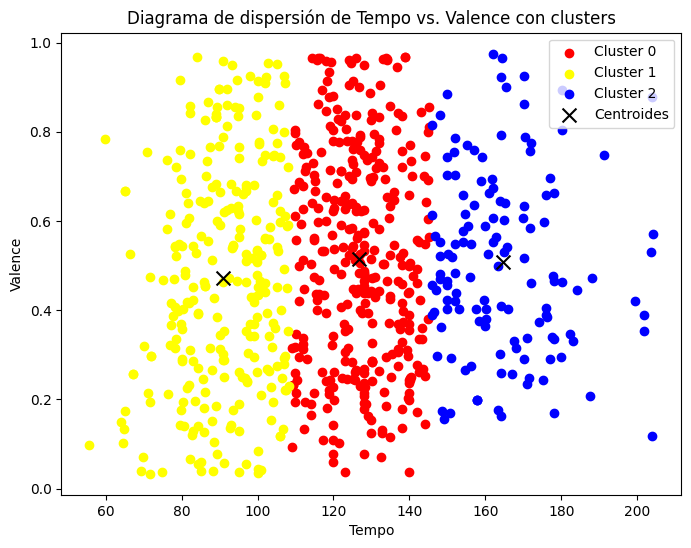

In [ ]:
# Crear un diagrama de dispersión con tempo y valence
plt.figure(figsize=(8, 6))
plt.scatter(dataSet[dataSet['cluster'] == 0]['tempo'], dataSet[dataSet['cluster'] == 0]['valence'], color='red', label='Cluster 0')
plt.scatter(dataSet[dataSet['cluster'] == 1]['tempo'], dataSet[dataSet['cluster'] == 1]['valence'], color='yellow', label='Cluster 1')
plt.scatter(dataSet[dataSet['cluster'] == 2]['tempo'], dataSet[dataSet['cluster'] == 2]['valence'], color='blue', label='Cluster 2')

# Mostrar los centroides
plt.scatter(centroids[:, columns_of_interest.index('tempo')], centroids[:, columns_of_interest.index('valence')], marker='x', s=100, color='black', label='Centroides')

plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.title('Diagrama de dispersión de Tempo vs. Valence con clusters')
plt.legend()
plt.show()

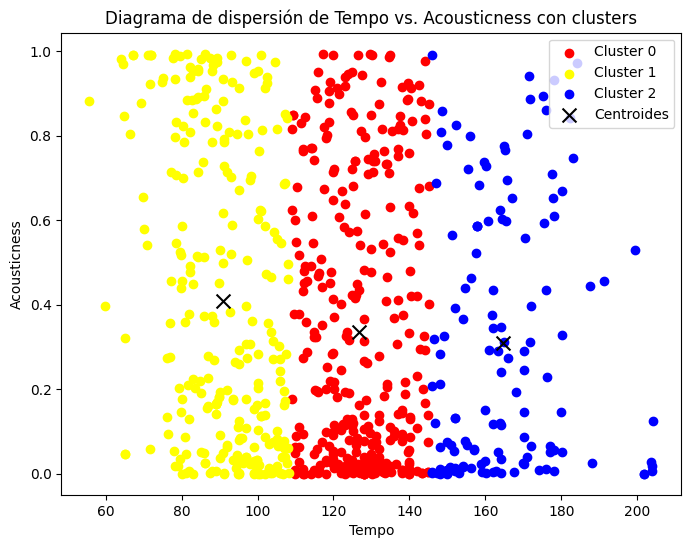

In [ ]:
# Crear un diagrama de dispersión con tempo y acousticness
plt.figure(figsize=(8, 6))
plt.scatter(dataSet[dataSet['cluster'] == 0]['tempo'], dataSet[dataSet['cluster'] == 0]['acousticness'], color='red', label='Cluster 0')
plt.scatter(dataSet[dataSet['cluster'] == 1]['tempo'], dataSet[dataSet['cluster'] == 1]['acousticness'], color='yellow', label='Cluster 1')
plt.scatter(dataSet[dataSet['cluster'] == 2]['tempo'], dataSet[dataSet['cluster'] == 2]['acousticness'], color='blue', label='Cluster 2')

# Mostrar los centroides
plt.scatter(centroids[:, columns_of_interest.index('tempo')], centroids[:, columns_of_interest.index('acousticness')], marker='x', s=100, color='black', label='Centroides')

plt.xlabel('Tempo')
plt.ylabel('Acousticness')
plt.title('Diagrama de dispersión de Tempo vs. Acousticness con clusters')
plt.legend()
plt.show()


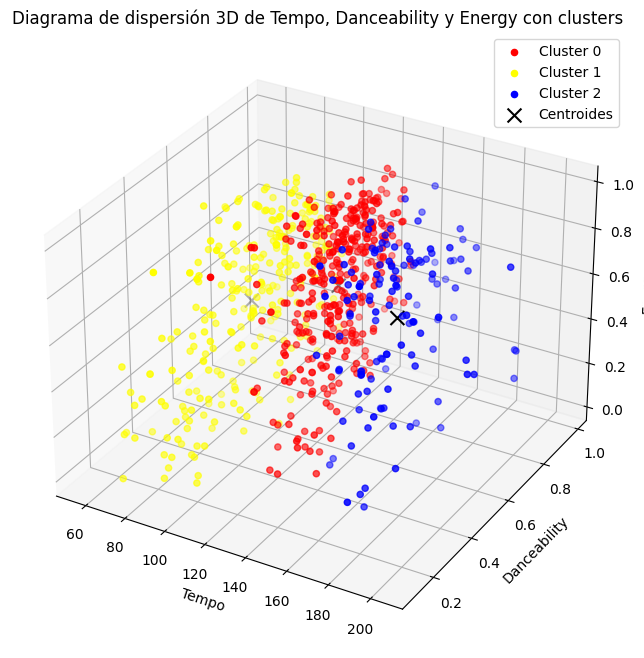

In [ ]:
# diagrama de dispersión entre Tempo, danceability y energy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataSet[dataSet['cluster'] == 0]['tempo'], dataSet[dataSet['cluster'] == 0]['danceability'], dataSet[dataSet['cluster'] == 0]['energy'], color='red', label='Cluster 0')
ax.scatter(dataSet[dataSet['cluster'] == 1]['tempo'], dataSet[dataSet['cluster'] == 1]['danceability'], dataSet[dataSet['cluster'] == 1]['energy'], color='yellow', label='Cluster 1')
ax.scatter(dataSet[dataSet['cluster'] == 2]['tempo'], dataSet[dataSet['cluster'] == 2]['danceability'], dataSet[dataSet['cluster'] == 2]['energy'], color='blue', label='Cluster 2')

# Mostrar los centroides
ax.scatter(centroids[:, columns_of_interest.index('tempo')], centroids[:, columns_of_interest.index('danceability')], centroids[:, columns_of_interest.index('energy')], marker='x', s=100, color='black', label='Centroides')

ax.set_xlabel('Tempo')
ax.set_ylabel('Danceability')
ax.set_zlabel('Energy')
ax.set_title('Diagrama de dispersión 3D de Tempo, Danceability y Energy con clusters')
ax.legend()
plt.show()
